In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
data_path = 'C:\\Users\\ahmad\\Documents\\ML Projects\\Laptop Price Prediction\\data\\laptop_data.csv'

In [81]:
df = pd.read_csv(data_path)
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [82]:
# drop irrelevant columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)
# Equal missing rows across features
#laptop.dropna(inplace=True)
# reset index after dropping rows
df.reset_index(drop=True, inplace=True)

In [83]:
laptop = df.copy()

### Data Analysis

In [84]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [85]:
laptop.shape

(1303, 11)

In [86]:
laptop.describe()

,Inches,Price
count,1273.000000,1273.000000
mean,15.129144,59955.814073
std,1.954580,37332.251005
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52161.120000
75%,15.600000,79333.387200
max,35.600000,324954.720000


In [87]:
laptop['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', nan, 'Chuwi',
       'MSI', 'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


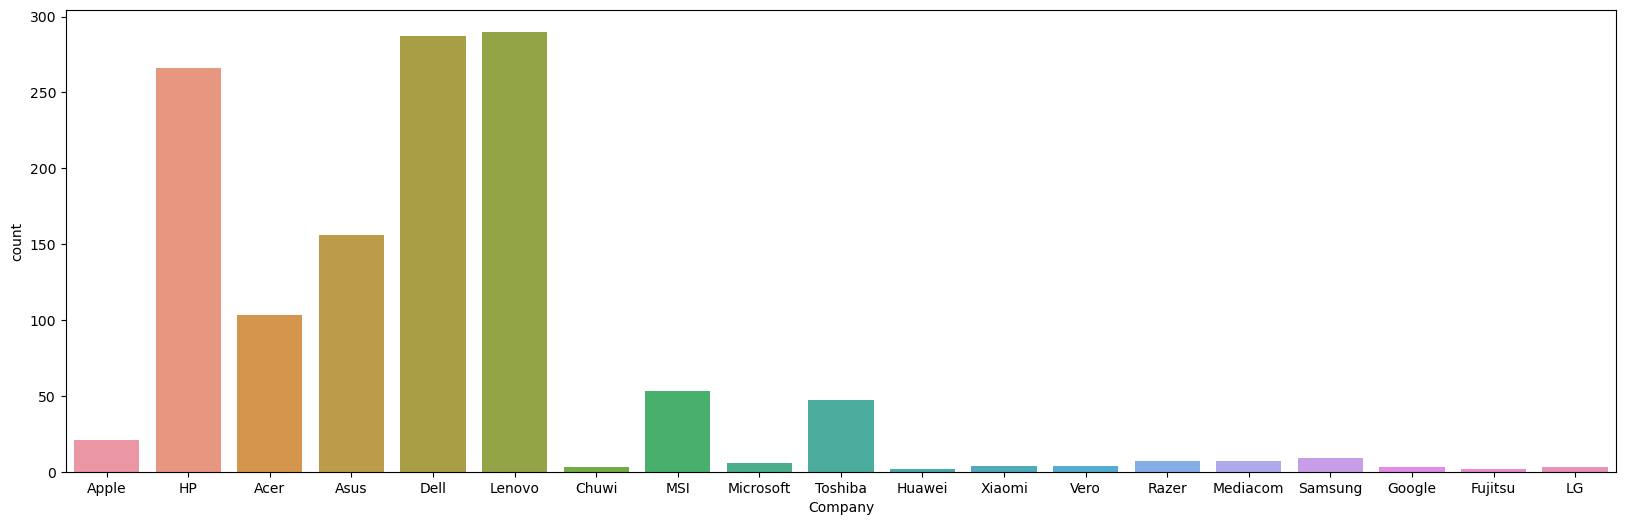

In [88]:
# plotting the company attributes
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Company", data=laptop, ax=ax)
plt.show()

c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


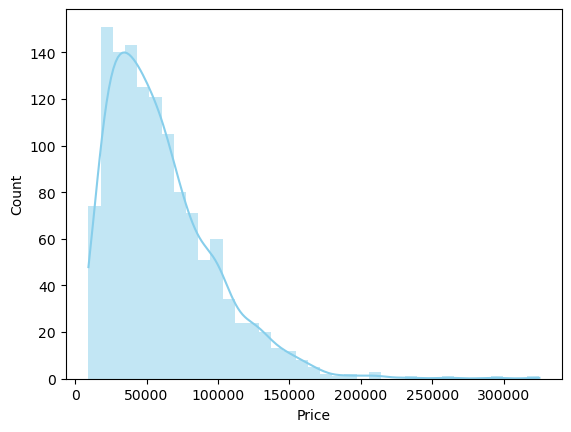

In [89]:
# plotting the price (target attribute)
sns.histplot(laptop['Price'], kde=True, color='skyblue', edgecolor=None)
plt.show()

The distribution is skewed and it shows cheaper laptops then to be sold frequently

##### How does brand name impacts the laptop price

c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


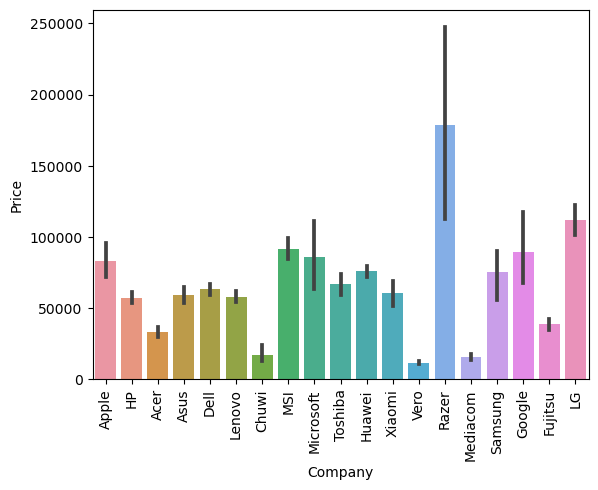

In [90]:
# plotting company relatively to the prices

sns.barplot(x=laptop['Company'], y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

Razer, Microsoft, Apple, Samsumg, Google, LG are expensive while the rest are within budget range

##### What type of laptop people prefer

<Axes: xlabel='TypeName'>

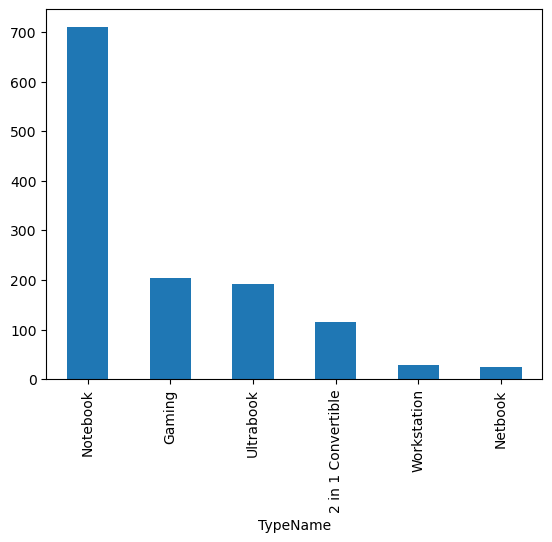

In [91]:
laptop['TypeName'].value_counts().plot(kind='bar')

c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


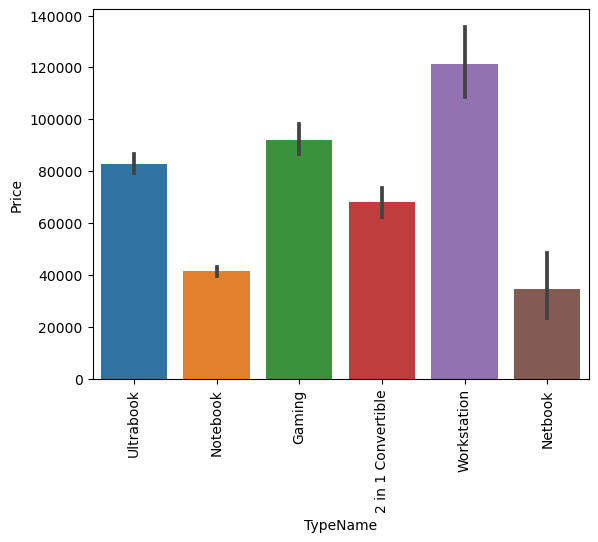

In [92]:
sns.barplot(x=laptop['TypeName'], y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

Notebook laptop is sold frequently and is because it is under budget range

##### Does price vary with laptop size (inches)?

In [93]:
laptop['Inches'] = laptop['Inches'].astype(float)

c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


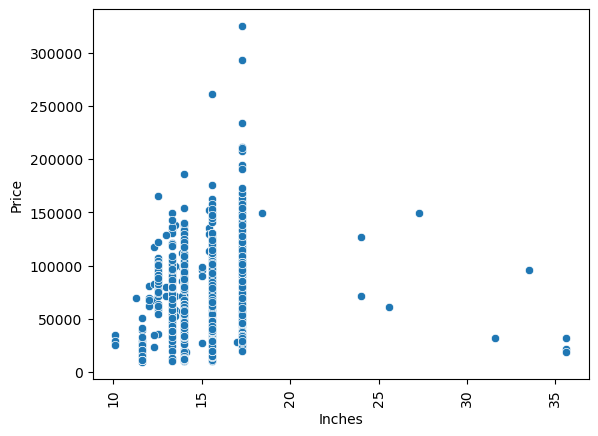

In [94]:
sns.scatterplot(x=laptop['Inches'], y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

It shows there is a strong relationship between the price and size columns

### Preprocessing

In [95]:
laptop.isna().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

<Axes: >

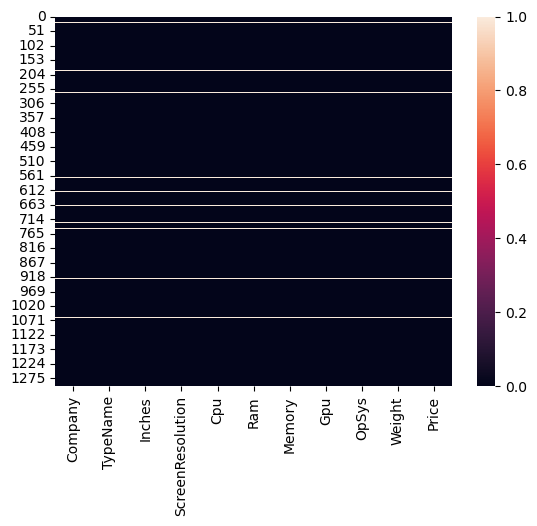

In [96]:
# plotting missing values
sns.heatmap(laptop.isna())    # all columns have equal missing values

In [97]:
laptop.isna().sum() / len(laptop) * 100  #only 2% of data is missing

Company             2.302379
TypeName            2.302379
Inches              2.302379
ScreenResolution    2.302379
Cpu                 2.302379
Ram                 2.302379
Memory              2.302379
Gpu                 2.302379
OpSys               2.302379
Weight              2.302379
Price               2.302379
dtype: float64

In [98]:
# Drop missing values
laptop.dropna(inplace=True)

In [99]:
laptop.isna().sum().sum()

0

### Ram Column

In [100]:
# cleaning Ram column
laptop['Ram'] = laptop['Ram'].str.replace('GB', '').astype(int)

c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


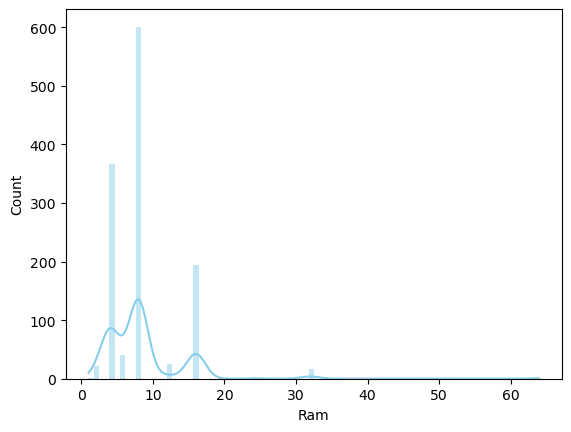

In [101]:
# RAM Distribution
sns.histplot(laptop['Ram'], kde=True, color='skyblue', edgecolor=None)
plt.show()

c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Ram', ylabel='Price'>

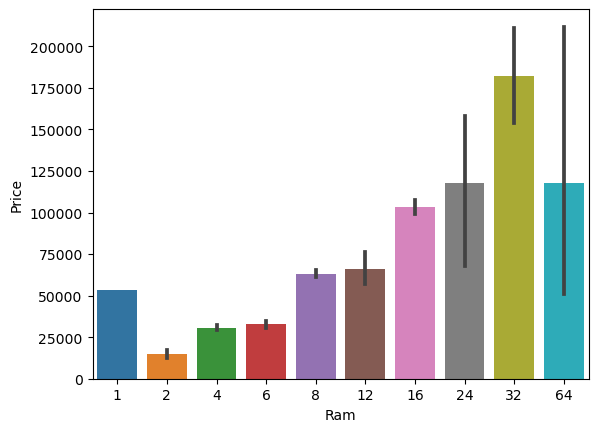

In [102]:
sns.barplot(x=laptop['Ram'], y=laptop['Price'])

### Weight Column

In [103]:
# Remove kg
laptop['Weight'] = laptop['Weight'].str.replace('kg', '').astype(float)

c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


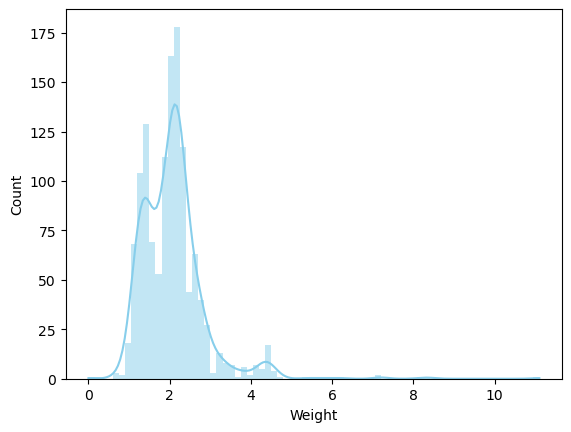

In [104]:
# Weight Distribution
sns.histplot(laptop['Weight'], kde=True, color='skyblue', edgecolor=None)
plt.show()

### Feature Engineering

In [105]:
laptop['ScreenResolution'].unique() # 40 Screen types (touch screen and non touch screen)

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', '1600x900',
       'IPS Panel 4K Ultra HD 3840x2160', '4K Ultra HD 3840x2160',
       'Touchscreen 1366x768', 'Touchscreen 2560x1440',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel Quad HD+ 3200x1800',
       'IPS Panel Qua

##### Extrac Touchscreen

In [106]:
# Adding a column of Touchscreen(1) and nonTouchscreen(2)
laptop['Touchscreen'] = laptop['ScreenResolution'].str.contains('Touchscreen', case=False).astype(int)
laptop['Touchscreen'].unique()

array([0, 1])

c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Touchscreen', ylabel='Price'>

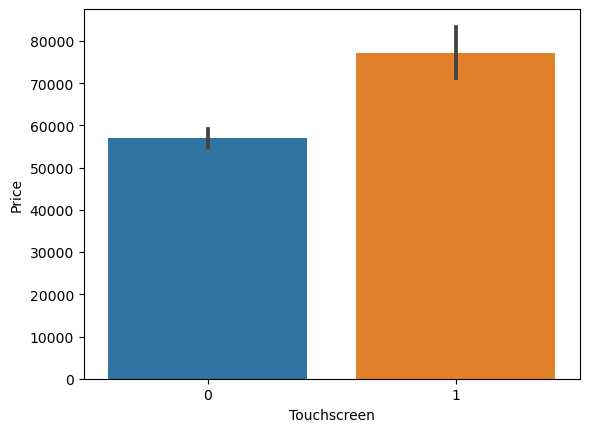

In [107]:
# how many laptops are touchscreen and which is more expensive
sns.barplot(x=laptop['Touchscreen'], y=laptop['Price'])

##### Excract IPS Screen

In [108]:
# Screen with In-plane switching(1) and non IPS(0)
laptop['IPS'] = laptop['ScreenResolution'].str.contains('IPS', case=False).astype(int)
laptop['IPS'].unique()

array([1, 0])

c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='IPS', ylabel='Price'>

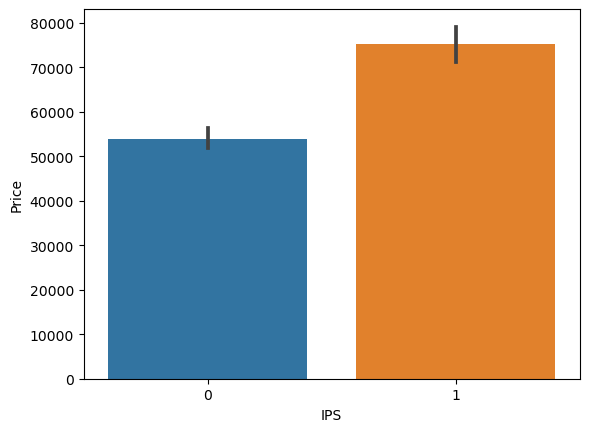

In [109]:
# ploting IPS features against Price
sns.barplot(x=laptop['IPS'], y=laptop['Price'])

##### Extract Resolution

In [110]:
laptop['Resolution'] = laptop['ScreenResolution'].str.extract(r'(\d+x\d+)')[0]
laptop['Resolution'].head()

0    2560x1600
1     1440x900
2    1920x1080
3    2880x1800
4    2560x1600
Name: Resolution, dtype: object

In [111]:
# Extract screen resolution dimensions
laptop[['X_res', 'Y_res']] = laptop['Resolution'].str.split('x', expand=True).astype(float)

In [112]:
laptop.select_dtypes(exclude='O').corr()['Price'].sort_values(ascending=False)

Price          1.000000
Ram            0.685648
X_res          0.557556
Y_res          0.554069
IPS            0.254851
Touchscreen    0.188994
Weight         0.175966
Inches         0.043032
Name: Price, dtype: float64

It shows that Inches doesn't have a strong correlation but X and Y axis resolution have a strong correlation, we can take advantage of it and convert these three columns into a single column that is Pixel Per Inches (PPI). The goal is to have fewer features to improve performance.

##### Creating PPI (Measurement of of the Resolution)

Replacing X and Y resolution to PPI (Pixel per inches)
PPI = sqrt(X^2 + Y^2) / Inches

In [113]:
laptop['PPI'] = ((laptop['X_res']**2 + laptop['Y_res']**2)**0.5) / laptop['Inches']

In [114]:
laptop.select_dtypes(exclude='O').corr()['Price'].sort_values(ascending=False)

Price          1.000000
Ram            0.685648
X_res          0.557556
Y_res          0.554069
PPI            0.469520
IPS            0.254851
Touchscreen    0.188994
Weight         0.175966
Inches         0.043032
Name: Price, dtype: float64

Now the correlation to price shows that PPI have a strong correlation

Since we are done extracting ScreenResolution, Inches , X_res, and Y_res combined to form PPI, Drop the Features

c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


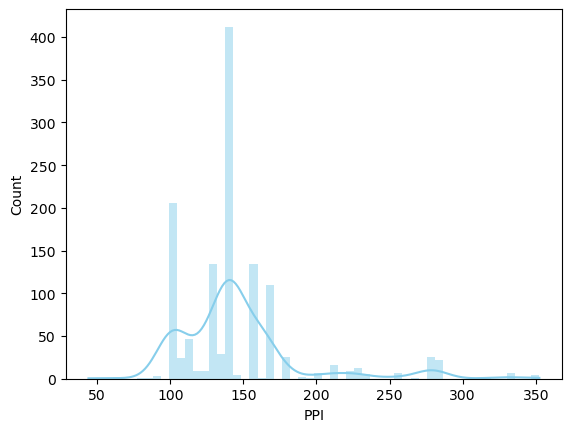

In [115]:
# PPI Distribution
sns.histplot(laptop['PPI'], kde=True, color='skyblue', edgecolor=None)
plt.show()

In [116]:
# drop unnecessary features
laptop.drop(columns=['ScreenResolution', 'Inches', 'X_res', 'Y_res'], inplace=True)

### Cpu Column

In [117]:
laptop['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'AMD E-Series E2-9000e 1.5GHz', 'Intel Core i5 1.6GHz',
       'Intel Core i7 8650U 1.9GHz', 'Intel Atom x5-Z8300 1.44GHz',
       'AMD E-Series E2-6110 1.5GHz', 'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Core i5 1.3GHz',
       'AMD FX 9830P 3GHz', '

In [118]:
# Extract cpu brand
cpu = laptop['Cpu'].apply(lambda x: ' '.join(x.split()[:2]))
cpu.unique()

array(['Intel Core', 'AMD A9-Series', 'AMD E-Series', 'Intel Atom',
       'AMD A6-Series', 'Intel Celeron', 'AMD Ryzen', 'Intel Pentium',
       'AMD FX', 'Intel Xeon', 'AMD A10-Series', 'AMD A8-Series',
       'AMD A12-Series', 'AMD A4-Series', 'Samsung Cortex'], dtype=object)

In [119]:
def group_cpu(cpu):
	cpu = cpu.lower()
	if "intel core" in cpu:
		return "Intel Core"
	elif "intel celeron" in cpu or "intel pentium" in cpu or "intel atom" in cpu or "intel xeon" in cpu:
		return "Intel Other"
	elif "amd ryzen" in cpu:
		return "AMD Series"
	elif "samsung" in cpu:
		return "Others"
	else:
		return "Others"

In [120]:
laptop['cpu'] = cpu.apply(group_cpu)
laptop['cpu'].value_counts()

cpu
Intel Core     1078
Intel Other     132
Others           59
AMD Series        4
Name: count, dtype: int64

In [121]:
laptop.drop(columns='Cpu', inplace=True)

c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


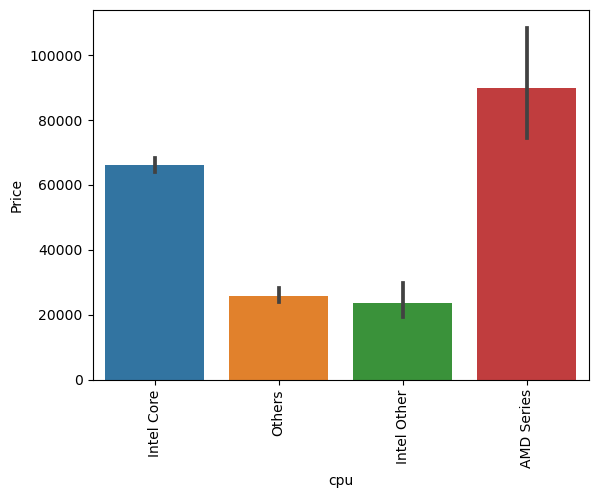

In [122]:
# How does price vary with processor?
sns.barplot(x=laptop['cpu'], y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

### Gpu Column

In [123]:
laptop['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
       'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeFo

In [124]:
gpu = laptop['Gpu'].apply(lambda x: x.split()[0])

In [125]:
def group_gpu(gpu):
	gpu = gpu.lower()
	if "intel" in gpu:
		return "Intel"
	elif "nvidia" in gpu:
		return "Nvidia"
	elif "amd" in gpu:
		return "AMD"
	else:
		return "Others"

In [126]:
laptop['gpu'] = gpu.apply(group_gpu)
laptop['gpu'].value_counts()

gpu
Intel     703
Nvidia    393
AMD       176
Others      1
Name: count, dtype: int64

In [127]:
laptop.drop(columns='Gpu', inplace=True)

c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


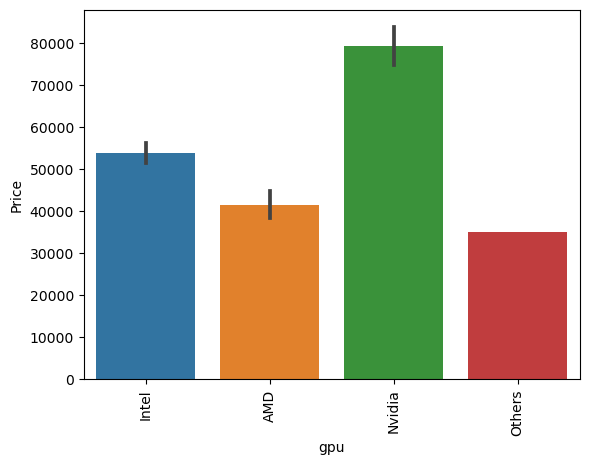

In [128]:
# How does price vary with processor?
sns.barplot(x=laptop['gpu'], y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

### OS Column

In [129]:
laptop['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

In [130]:
def group_os(os):
	if os in ['Windows 10', 'Windows 10 S', 'Windows 7']:
		return 'Windows'
	elif os in ['MacOS', 'Mac OS X']:
		return 'Mac'
	else:
		return 'Linux/Others/No Os'

In [131]:
laptop['os'] = laptop['OpSys'].apply(group_os)
laptop['os'].value_counts()

os
Windows               1100
Linux/Others/No Os     165
Mac                      8
Name: count, dtype: int64

In [132]:
laptop.drop(columns='OpSys', inplace=True)

c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


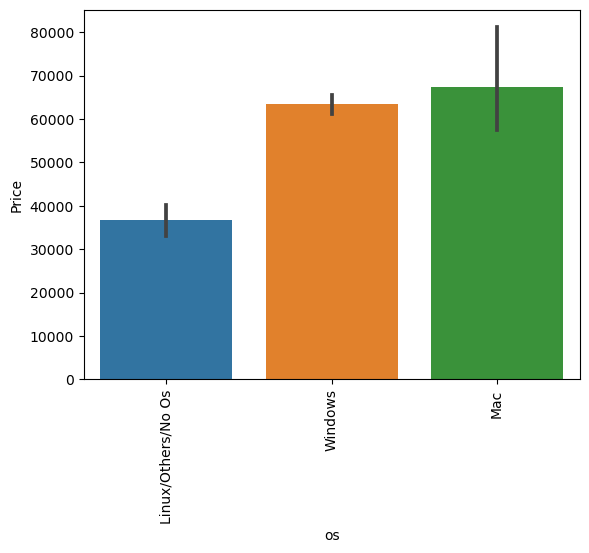

In [133]:
# How does price vary with processor?
sns.barplot(x=laptop['os'], y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

### Memory Column

In [134]:
laptop['Memory'].unique() # 40 different kinds of memory

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

This memory column is a noisy column that gives an understanding of Hard Drives.

4 different categories of memory; HHD, SSD, Flash Storage, and Hybrid

In [135]:
def extract_memory(mem):
	hdd = ssd = hybrid = flash = 0
	parts = mem.split('+')
	for part in parts:
		part = part.strip()
		size = 0
		if 'TB' in part:
			size = int(float(part.split('TB')[0]) * 1000)
		elif 'GB' in part:
			size = int(part.split('GB')[0])
		if 'HDD' in part:
			hdd += size
		elif 'SSD' in part:
			ssd += size
		elif 'Hybrid' in part:
			hybrid += size
		elif 'Flash Storage' in part:
			flash += size
	return pd.Series([hdd, ssd, hybrid, flash])

In [136]:
laptop[['HDD', 'SSD', 'Hybrid', 'Flash']] = laptop['Memory'].apply(extract_memory)
laptop[['HDD', 'SSD', 'Hybrid', 'Flash']]

,HDD,SSD,Hybrid,Flash
0,0,128,0,0
1,0,0,0,128
2,0,256,0,0
3,0,512,0,0
4,0,256,0,0
...,...,...,...,...
1298,0,128,0,0
1299,0,512,0,0
1300,0,0,0,64
1301,1000,0,0,0


In [137]:
# drop memory column
laptop.drop(columns='Memory', inplace=True)

In [138]:
laptop.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,Resolution,PPI,cpu,gpu,os,HDD,SSD,Hybrid,Flash
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,2560x1600,226.983005,Intel Core,Intel,Linux/Others/No Os,0,128,0,0
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,1440x900,127.677940,Intel Core,Intel,Linux/Others/No Os,0,0,0,128
2,HP,Notebook,8,1.86,30636.0000,0,0,1920x1080,141.211998,Intel Core,Intel,Linux/Others/No Os,0,256,0,0
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,2880x1800,220.534624,Intel Core,AMD,Linux/Others/No Os,0,512,0,0
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,2560x1600,226.983005,Intel Core,Intel,Linux/Others/No Os,0,256,0,0


### Automation Class

In [139]:
class LaptopFeatureEngineer:
    def __init__(self):
        pass

    def clean_cpu(self, cpu):
        cpu = cpu.lower()
        if "intel core" in cpu:
            return "Intel Core"
        elif "intel celeron" in cpu or "intel pentium" in cpu or "intel atom" in cpu or "intel xeon" in cpu:
            return "Intel Other"
        elif "amd ryzen" in cpu:
            return "AMD Series"
        elif "samsung" in cpu:
            return "Others"
        else:
            return "Others"

    def clean_gpu(self, gpu):
        gpu = gpu.lower()
        if "intel" in gpu:
            return "Intel"
        elif "nvidia" in gpu:
            return "Nvidia"
        elif "amd" in gpu:
            return "AMD"
        else:
            return "Others"

    def clean_os(self, os):
        if os in ['Windows 10', 'Windows 10 S', 'Windows 7']:
            return 'Windows'
        elif os in ['MacOS', 'Mac OS X']:
            return 'Mac'
        else:
            return 'Linux/Others/No Os'

    def clean_memory(self, mem):
        hdd = ssd = hybrid = flash = 0
        if isinstance(mem, str):
            parts = mem.split('+')
            for part in parts:
                part = part.strip()
                size = 0
                if 'TB' in part:
                    size = int(float(part.split('TB')[0]) * 1000)
                elif 'GB' in part:
                    size = int(part.split('GB')[0])
                if 'HDD' in part:
                    hdd += size
                elif 'SSD' in part:
                    ssd += size
                elif 'Hybrid' in part:
                    hybrid += size
                elif 'Flash Storage' in part:
                    flash += size
        return pd.Series([hdd, ssd, hybrid, flash])

    def transform(self, df):
        df = df.copy()
        df = df.dropna()
        df = df[df['Weight'] != '?']
        
        df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
        df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
        df['Inches'] = df['Inches'].astype(float)

        df['Touchscreen'] = df['ScreenResolution'].str.contains('Touchscreen', case=False).astype(int)
        df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')[0]
        df[['X_res', 'Y_res']] = df['Resolution'].str.split('x', expand=True).astype(float)
        df['PPI'] = ((df['X_res']**2 + df['Y_res']**2)**0.5) / df['Inches']
        
        df['cpu'] = df['Cpu'].apply(lambda x: ' '.join(x.split()[:2])).apply(self.clean_cpu)
        df['gpu'] = df['Gpu'].apply(lambda x: x.split()[0]).apply(self.clean_gpu)
        df['os'] = df['OpSys'].apply(self.clean_os)

        df[['HDD', 'SSD', 'Hybrid', 'Flash']] = df['Memory'].apply(self.clean_memory)

        df.drop(columns=[
            'Unnamed: 0', 'ScreenResolution', 'Resolution', 'X_res', 'Y_res', 'Inches',
            'Cpu', 'Gpu', 'OpSys', 'Memory', 'OpSys',
        ], inplace=True, errors='ignore')

        return df


In [140]:
# test preprocessing class
preprocessing = LaptopFeatureEngineer()

In [141]:
transformed_df = preprocessing.transform(df)
transformed_df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,PPI,cpu,gpu,os,HDD,SSD,Hybrid,Flash
0,Apple,Ultrabook,8,1.37,71378.6832,0,226.983005,Intel Core,Intel,Linux/Others/No Os,0,128,0,0
1,Apple,Ultrabook,8,1.34,47895.5232,0,127.677940,Intel Core,Intel,Linux/Others/No Os,0,0,0,128
2,HP,Notebook,8,1.86,30636.0000,0,141.211998,Intel Core,Intel,Linux/Others/No Os,0,256,0,0
3,Apple,Ultrabook,16,1.83,135195.3360,0,220.534624,Intel Core,AMD,Linux/Others/No Os,0,512,0,0
4,Apple,Ultrabook,8,1.37,96095.8080,0,226.983005,Intel Core,Intel,Linux/Others/No Os,0,256,0,0


In [142]:
transformed_df['Price']

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1273, dtype: float64

c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


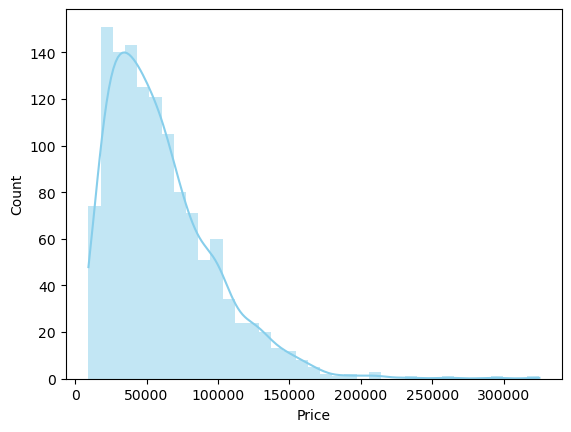

In [143]:
# plotting the price (target attribute)
sns.histplot(transformed_df['Price'], kde=True, color='skyblue', edgecolor=None)
plt.show()

The distribution of the target variable(Price) is right-skewed. By transforming it to normal distribution, performance of the
algorithm will increase. We can take log of the values which will transform to a normal distribution.

### Log-Normal Transformation

c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


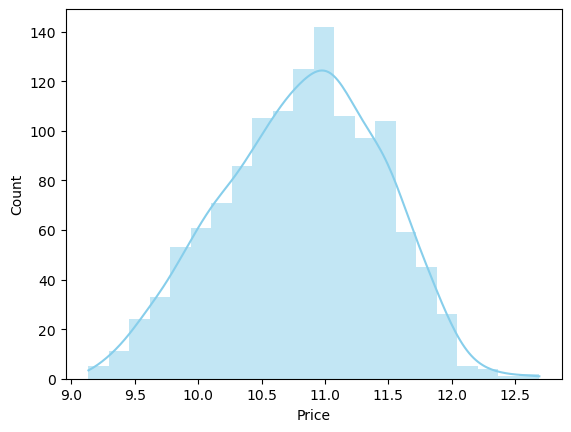

In [144]:
sns.histplot(np.log(transformed_df['Price']), kde=True, color='skyblue', edgecolor=None)
plt.show()

##### Corrlation of Features with Price

In [145]:
transformed_df.select_dtypes(exclude='O').corr()['Price'].sort_values(ascending=False)

Price          1.000000
Ram            0.685648
SSD            0.668416
PPI            0.469520
Touchscreen    0.188994
Weight         0.175966
Hybrid         0.007843
Flash         -0.038332
HDD           -0.095394
Name: Price, dtype: float64

### ML Modeling!

##### Features Importance to check predictive power

In [146]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [163]:
X = transformed_df.drop(columns='Price')
y = np.log(transformed_df['Price'])

In [164]:
preprocessor = ColumnTransformer(
	transformers=[
		('cat', OneHotEncoder(handle_unknown='ignore'), ['Company', 'TypeName', 'cpu', 'gpu', 'os'])
	],
	remainder='passthrough'  # keep the rest of the columns as they are
)

In [165]:
X_train_transform = preprocessor.fit_transform(X)
X_train_transform.shape

(1273, 44)

In [166]:
transformed_df.shape

(1273, 14)

In [167]:
y.shape

(1273,)

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_transform, y, test_size=0.2, random_state=42)

In [172]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
# check feature importance
feature_names = preprocessor.get_feature_names_out()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(lin_reg.coef_)
}).sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
17,cat__Company_Vero,0.682470
24,cat__TypeName_Workstation,0.451703
25,cat__cpu_AMD Series,0.433996
27,cat__cpu_Intel Other,0.390254
9,cat__Company_LG,0.359278
6,cat__Company_Google,0.358141
12,cat__Company_Mediacom,0.354537
1,cat__Company_Apple,0.347763
3,cat__Company_Chuwi,0.341163
13,cat__Company_Microsoft,0.282946


c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


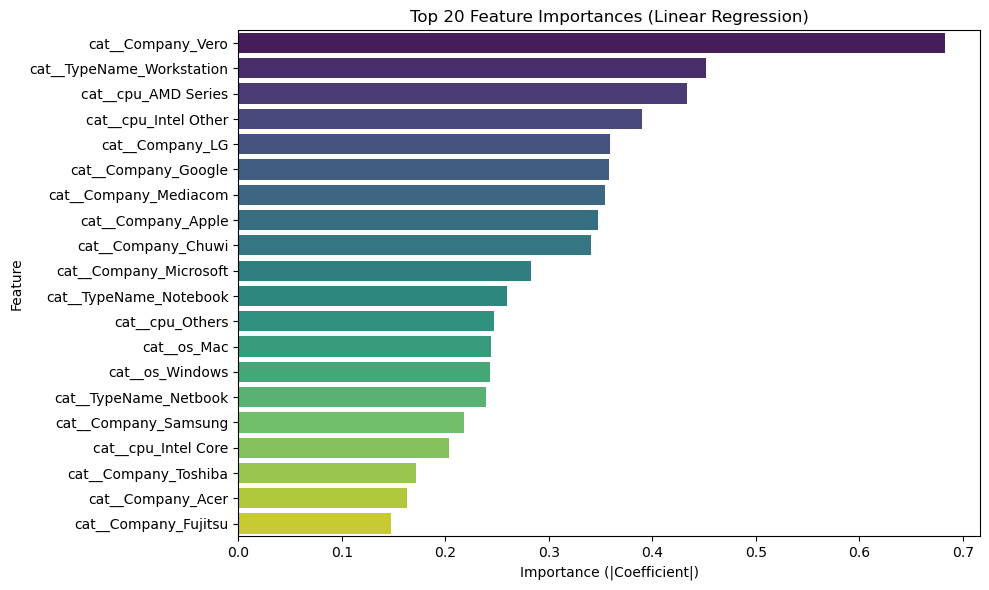

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 20 most important features
top_n = 20
top_features = importance_df.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title(f'Top {top_n} Feature Importances (Linear Regression)')
plt.xlabel('Importance (|Coefficient|)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [176]:
# random forest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Get feature names
feature_names = preprocessor.get_feature_names_out()
# Get feature importances
importances = rf.feature_importances_
# Build dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
36,remainder__Ram,0.582022
37,remainder__Weight,0.085650
26,cat__cpu_Intel Core,0.078037
22,cat__TypeName_Notebook,0.067485
39,remainder__PPI,0.051361
41,remainder__SSD,0.036356
33,cat__os_Linux/Others/No Os,0.010994
24,cat__TypeName_Workstation,0.008824
35,cat__os_Windows,0.008665
40,remainder__HDD,0.007201


c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


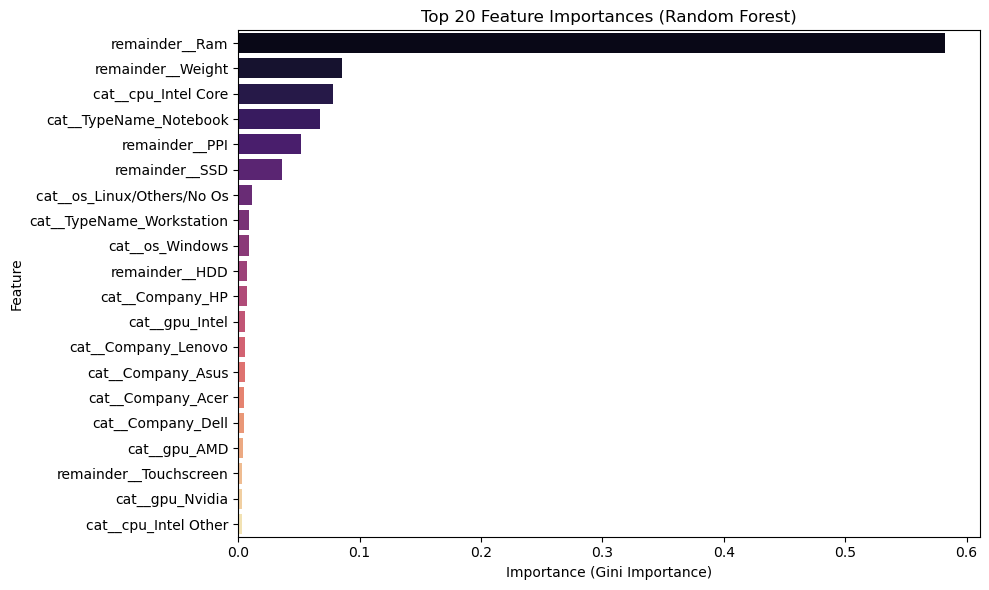

In [177]:
# Plot top 20 most important features
top_n = 20
top_features = importance_df.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='magma')
plt.title(f'Top {top_n} Feature Importances (Random Forest)')
plt.xlabel('Importance (Gini Importance)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### Create a ProfileReport of the Data

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(laptop, title="Laptop Profile")

profile.to_notebook_iframe()
profile.to_file("laptop.html")